In [1]:
!pip install --user pandas==1.0.3
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from lxml.html import fromstring
from bs4 import BeautifulSoup
import requests

     |████████████████████████████████| 10.0MB 7.7MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.


In [4]:
headers = {'User-Agent': 'Mozilla/5.0' }
url = 'https://blog.gaijinpot.com/how-much-is-the-average-rent-in-tokyo-in-2019/'
hd = requests.get(url, headers = headers)

In [5]:
hd.status_code

200

In [6]:
soup = BeautifulSoup(hd.content, 'html.parser' )
table = soup.find_all('div', class_= "table-responsive")

In [7]:
len(table)

2

In [8]:
table = table[0]
content = [content.get_text() for content in table.find_all('td')]
content

['Tokyo Wards',
 'Average cost per month by Japanese apartment size',
 '1R',
 '1K',
 '2K',
 '2DK',
 '1DK',
 '1LDK',
 'Edogawa',
 '61,200',
 '68,300',
 '72,400',
 '89,800',
 '75,200',
 '110,200',
 'Katsushika',
 '59,400',
 '69,200',
 '67,600',
 '85,100',
 '87,900',
 '95,700',
 'Adachi',
 '63,600',
 '70,500',
 '65,600',
 '91,500',
 '77,100',
 '106,500',
 'Nerima',
 '62,100',
 '75,400',
 '86,600',
 '105,000',
 '110,200',
 '119,300',
 'Itabashi',
 '86,600',
 '80,800',
 '78,900',
 '102,200',
 '100,500',
 '133,200',
 'Suginami',
 '69,900',
 '81,500',
 '100,200',
 '113,100',
 '87,000',
 '132,700',
 'Kita',
 '74,900',
 '82,000',
 '83,600',
 '110,600',
 '117,900',
 '157,800',
 'Arakawa',
 '71,900',
 '83,700',
 '81,100',
 '100,200',
 '102,800',
 '126,100',
 'Ota',
 '75,500',
 '84,200',
 '88,600',
 '117,200',
 '101,800',
 '138,400',
 'Setagaya',
 '80,100',
 '86,900',
 '99,000',
 '137,700',
 '127,000',
 '163,500',
 'Toshima',
 '84,900',
 '87,800',
 '96,700',
 '125,800',
 '110,400',
 '158,600',
 'N

In [9]:
content.remove('Tokyo Wards')
content.remove('Average cost per month by Japanese apartment size')
content.remove('1R')
content.remove('1K')
content.remove('2K')
content.remove('1DK')
content.remove('1LDK')
content.remove('2DK')

In [10]:
typed_list = []

for index, value in enumerate(content):
    if index%7 == 0:
        typed_list.append(value)
    else:
        typed_list.append(int(str(value).replace(',','')))
        
typed_list

['Edogawa',
 61200,
 68300,
 72400,
 89800,
 75200,
 110200,
 'Katsushika',
 59400,
 69200,
 67600,
 85100,
 87900,
 95700,
 'Adachi',
 63600,
 70500,
 65600,
 91500,
 77100,
 106500,
 'Nerima',
 62100,
 75400,
 86600,
 105000,
 110200,
 119300,
 'Itabashi',
 86600,
 80800,
 78900,
 102200,
 100500,
 133200,
 'Suginami',
 69900,
 81500,
 100200,
 113100,
 87000,
 132700,
 'Kita',
 74900,
 82000,
 83600,
 110600,
 117900,
 157800,
 'Arakawa',
 71900,
 83700,
 81100,
 100200,
 102800,
 126100,
 'Ota',
 75500,
 84200,
 88600,
 117200,
 101800,
 138400,
 'Setagaya',
 80100,
 86900,
 99000,
 137700,
 127000,
 163500,
 'Toshima',
 84900,
 87800,
 96700,
 125800,
 110400,
 158600,
 'Nakano',
 80000,
 90800,
 92000,
 137300,
 112100,
 144400,
 'Sumida',
 90600,
 91300,
 80400,
 145100,
 118000,
 144700,
 'Koto',
 98500,
 94000,
 88600,
 119800,
 129400,
 165400,
 'Bunkyo',
 95800,
 94400,
 116700,
 146300,
 120000,
 190000,
 'Shinagawa',
 98600,
 99700,
 124400,
 128400,
 139300,
 173500,
 'Ta

In [11]:
head = ['Tokyo Ward', '1R','1K','2K','2DK','1DK','1LDK']
data = list(zip(*[iter(typed_list)]*7))
Wards = pd.DataFrame(data[0:], columns = head)
Wards.head(10)

,Tokyo Ward,1R,1K,2K,2DK,1DK,1LDK
0,Edogawa,61200,68300,72400,89800,75200,110200
1,Katsushika,59400,69200,67600,85100,87900,95700
2,Adachi,63600,70500,65600,91500,77100,106500
3,Nerima,62100,75400,86600,105000,110200,119300
4,Itabashi,86600,80800,78900,102200,100500,133200
5,Suginami,69900,81500,100200,113100,87000,132700
6,Kita,74900,82000,83600,110600,117900,157800
7,Arakawa,71900,83700,81100,100200,102800,126100
8,Ota,75500,84200,88600,117200,101800,138400
9,Setagaya,80100,86900,99000,137700,127000,163500


In [12]:
Wards_n = Wards.sort_values(by='1LDK', ascending=True)
Wards_n

,Tokyo Ward,1R,1K,2K,2DK,1DK,1LDK
1,Katsushika,59400,69200,67600,85100,87900,95700
2,Adachi,63600,70500,65600,91500,77100,106500
0,Edogawa,61200,68300,72400,89800,75200,110200
3,Nerima,62100,75400,86600,105000,110200,119300
7,Arakawa,71900,83700,81100,100200,102800,126100
5,Suginami,69900,81500,100200,113100,87000,132700
4,Itabashi,86600,80800,78900,102200,100500,133200
8,Ota,75500,84200,88600,117200,101800,138400
11,Nakano,80000,90800,92000,137300,112100,144400
12,Sumida,90600,91300,80400,145100,118000,144700


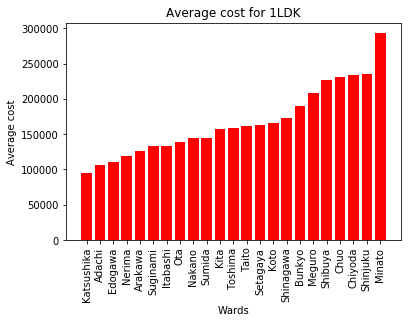

In [14]:
import matplotlib.pyplot as plt
plt.bar("Tokyo Ward",'1LDK', data=Wards_n, color= "red", )
plt.xlabel("Wards")
plt.ylabel("1LDK")
plt.xticks(rotation = 90)
plt.ylabel("Average cost")
plt.title("Average cost for 1LDK")
plt.show()

In [15]:
# create a list  
data = [['Edogawa', 35.7067, 139.8682], ['Katsushika', 35.7433, 139.8472], ['Adachi', 35.7750, 139.8044], ['Nerima', 35.7356, 139.6517],
        ['Itabashi', 35.7512, 139.7093], ['Suginami', 35.6995, 139.6355], ['Kita', 34.7066, 135.5016], ['Arakawa', 35.7359, 139.7835],
        ['Ota', 35.5614, 139.7161], ['Setagaya', 35.6466, 139.6533], ['Toshima', 35.7263, 139.7168], ['Nakano', 35.7075, 139.6638],
        ['Sumida', 35.7107, 139.8016], ['Koto', 35.6728, 139.8175], ['Bunkyo', 35.7079, 139.7524], ['Shinagawa', 35.6092, 139.7303],
        ['Taito', 35.7126, 139.7802], ['Shinjuku', 35.6938, 139.7034], ['Chuo', 35.6706, 139.7720], ['Meguro', 35.6415, 139.6981],
        ['Minato', 35.6581, 139.7515], ['Shibuya', 35.6620, 139.7038], ['Chiyoda', 35.6940, 139.7538]] 
  
# Create the pandas DataFrame 
tll = pd.DataFrame(data, columns = ['Tokyo Ward', 'Latitude', 'Longitude'])  
tll.head(5) 

,Tokyo Ward,Latitude,Longitude
0,Edogawa,35.7067,139.8682
1,Katsushika,35.7433,139.8472
2,Adachi,35.7750,139.8044
3,Nerima,35.7356,139.6517
4,Itabashi,35.7512,139.7093


In [16]:
Wards_final = pd.merge(Wards, tll, on = 'Tokyo Ward')
Wards_final

,Tokyo Ward,1R,1K,2K,2DK,1DK,1LDK,Latitude,Longitude
0,Edogawa,61200,68300,72400,89800,75200,110200,35.7067,139.8682
1,Katsushika,59400,69200,67600,85100,87900,95700,35.7433,139.8472
2,Adachi,63600,70500,65600,91500,77100,106500,35.7750,139.8044
3,Nerima,62100,75400,86600,105000,110200,119300,35.7356,139.6517
4,Itabashi,86600,80800,78900,102200,100500,133200,35.7512,139.7093
5,Suginami,69900,81500,100200,113100,87000,132700,35.6995,139.6355
6,Kita,74900,82000,83600,110600,117900,157800,34.7066,135.5016
7,Arakawa,71900,83700,81100,100200,102800,126100,35.7359,139.7835
8,Ota,75500,84200,88600,117200,101800,138400,35.5614,139.7161
9,Setagaya,80100,86900,99000,137700,127000,163500,35.6466,139.6533


## K- means clustering

In [17]:
kclusters = 3
wards_new = Wards_final.drop('Tokyo Ward', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(wards_new)
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
# adding clustering labels

Wards_final.insert(0, 'Cluster Labels', kmeans.labels_)
Wards_final

,Cluster Labels,Tokyo Ward,1R,1K,2K,2DK,1DK,1LDK,Latitude,Longitude
0,2,Edogawa,61200,68300,72400,89800,75200,110200,35.7067,139.8682
1,2,Katsushika,59400,69200,67600,85100,87900,95700,35.7433,139.8472
2,2,Adachi,63600,70500,65600,91500,77100,106500,35.7750,139.8044
3,2,Nerima,62100,75400,86600,105000,110200,119300,35.7356,139.6517
4,2,Itabashi,86600,80800,78900,102200,100500,133200,35.7512,139.7093
5,2,Suginami,69900,81500,100200,113100,87000,132700,35.6995,139.6355
6,0,Kita,74900,82000,83600,110600,117900,157800,34.7066,135.5016
7,2,Arakawa,71900,83700,81100,100200,102800,126100,35.7359,139.7835
8,2,Ota,75500,84200,88600,117200,101800,138400,35.5614,139.7161
9,0,Setagaya,80100,86900,99000,137700,127000,163500,35.6466,139.6533


In [19]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [21]:
address = 'Tokyo, Japan'
geolocator = Nominatim(user_agent="Tokyo")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Tokyo are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Tokyo are 35.6828387, 139.7594549.


In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers
markers_colors = []
for lat, lon, poi, cluster in zip(Wards_final['Latitude'], Wards_final['Longitude'], Wards_final['Tokyo Ward'], Wards_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Get the venues list from foursquare for 3 Wards each one representing cluster. Toshima (0), Shibuya (1), Adachi (2).

In [23]:
# The code was removed by Watson Studio for sharing.

In [24]:
new_3 = Wards_final.loc[[11, 18, 1], :]
new_3.reset_index(drop=True, inplace = True)
new_3

,Cluster Labels,Tokyo Ward,1R,1K,2K,2DK,1DK,1LDK,Latitude,Longitude
0,0,Nakano,80000,90800,92000,137300,112100,144400,35.7075,139.6638
1,1,Chuo,124100,111000,120300,158200,163200,231700,35.6706,139.7720
2,2,Katsushika,59400,69200,67600,85100,87900,95700,35.7433,139.8472


In [25]:
ON = '20180605' 
neighborhood_latitude = new_3.loc[0, 'Latitude'] 
neighborhood_longitude = new_3.loc[0, 'Longitude'] 

neighborhood_name = new_3.loc[0, 'Tokyo Ward'] 

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Nakano are 35.7075, 139.6638.


In [26]:
LIMIT = 100 
radius = 750 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eec59a1aba297001bfa2835'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Suginami',
  'headerFullLocation': 'Suginami, Tokyo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 152,
  'suggestedBounds': {'ne': {'lat': 35.71425000675001,
    'lng': 139.67209722231271},
   'sw': {'lat': 35.70074999325, 'lng': 139.6555027776873}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f6c6bcae4b08d8da4c7b61b',
       'name': 'Nakano Shikinomori Park (中野四季の森公園)',
       'location': {'address': '中野4-13',
        'lat': 35.70747061007309,
        'lng': 139.66143897653527,
        'labeledLatLngs': [{'label': 'display',
          'lat': 35

#### Extract the category of the venue

In [28]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues_toshima = results['response']['groups'][0]['items']

In [30]:
import json
from pandas.io.json import json_normalize
nearby_venues = pd.json_normalize(venues_toshima) 

#### Create another function.

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
      
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        

        results = requests.get(url).json()["response"]['groups'][0]['items']
        
       
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    venues_toshima = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues_toshima.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(venues_toshima)


In [33]:
venues_3 = getNearbyVenues(names = new_3['Tokyo Ward'],
                                   latitudes = new_3['Latitude'],
                                   longitudes = new_3['Longitude']
                                  )

Nakano
Chuo
Katsushika


In [34]:
venues_3.rename(columns={"Neighborhood Latitude": "latitude", "Neighborhood Longitude": "longitude"})

,Neighborhood,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Nakano,35.7075,139.6638,Nakano Shikinomori Park (中野四季の森公園),35.707471,139.661439,Park
1,Nakano,35.7075,139.6638,Nakano Broadway (中野ブロードウェイ),35.708493,139.665612,Shopping Mall
2,Nakano,35.7075,139.6638,Gyu no Shimonya (牛の四文屋),35.706655,139.666131,BBQ Joint
3,Nakano,35.7075,139.6638,Nakano Sunplaza Hall (中野サンプラザホール),35.707720,139.664556,Concert Hall
4,Nakano,35.7075,139.6638,Fujiya Camera (フジヤカメラ 本店),35.706755,139.666525,Camera Store
...,...,...,...,...,...,...,...
223,Katsushika,35.7433,139.8472,青戸車庫バス停,35.743835,139.843277,Bus Stop
224,Katsushika,35.7433,139.8472,ワークマン 葛飾立石店,35.742977,139.842688,Clothing Store
225,Katsushika,35.7433,139.8472,業務スーパー 河内屋 立石店,35.742589,139.842666,Grocery Store
226,Katsushika,35.7433,139.8472,天ぷら割烹 うさぎ,35.747115,139.848740,Japanese Restaurant


In [35]:
venues_3.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Chuo,100,100,100,100,100,100
Katsushika,28,28,28,28,28,28
Nakano,100,100,100,100,100,100


In [36]:
Wards_onehot = pd.get_dummies(venues_3[['Venue Category']], prefix="", prefix_sep="")

Wards_onehot['Neighborhood'] = venues_3['Neighborhood'] 

fixed_columns = [Wards_onehot.columns[-1]] + list(Wards_onehot.columns[:-1])
Wards_onehot = Wards_onehot[fixed_columns]

Wards_onehot.head()

,Neighborhood,Arcade,Automotive Shop,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Bookstore,Brewery,...,Tempura Restaurant,Thai Restaurant,Theater,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Nakano,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nakano,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nakano,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Nakano,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nakano,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
venues_grouped = Wards_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

,Neighborhood,Arcade,Automotive Shop,BBQ Joint,Bakery,Bar,Bed & Breakfast,Bistro,Bookstore,Brewery,...,Tempura Restaurant,Thai Restaurant,Theater,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Chuo,0.00,0.000000,0.020000,0.020000,0.01,0.01,0.01,0.00,0.00,...,0.01,0.00,0.01,0.03,0.00,0.01,0.00,0.04,0.00,0.03
1,Katsushika,0.00,0.035714,0.035714,0.035714,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Nakano,0.01,0.000000,0.040000,0.000000,0.02,0.00,0.02,0.02,0.01,...,0.00,0.01,0.02,0.00,0.03,0.01,0.01,0.01,0.02,0.01


### Top 5 most common venues

In [38]:
num_top_venues = 5

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Chuo----
                 venue  freq
0     Sushi Restaurant  0.08
1  Japanese Restaurant  0.08
2     Ramen Restaurant  0.06
3      Soba Restaurant  0.06
4          Coffee Shop  0.06


----Katsushika----
                 venue  freq
0          Supermarket  0.11
1    Convenience Store  0.11
2       Discount Store  0.07
3     Sushi Restaurant  0.07
4  Japanese Restaurant  0.07


----Nakano----
                 venue  freq
0     Ramen Restaurant  0.10
1  Japanese Restaurant  0.07
2             Sake Bar  0.07
3                 Café  0.06
4            BBQ Joint  0.04


